In [1]:
'''Code for fine-tuning Inception V3 for a new task.

Start with Inception V3 network, not including last fully connected layers.

Train a simple fully connected layer on top of these.


'''

import numpy as np
import pandas as pd
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout
import keras.applications.inception_v3 as inception
import cnn_d as OurNetwork
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
IMSIZE = (196, 196)

PHOTO_PATH = r"\\devmachine\e$\data\katkam-secret-location\katkam-scaled"



Using TensorFlow backend.


In [2]:
cleaned_data = pd.read_csv("cleaned_data.csv")
weather_array = list(map(lambda x:x.split(',') ,cleaned_data["Mapped"].values))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(weather_array)
cleaned_data["Y"] = list(Y)

cleaned_data
# print(mlb.classes_)

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]"
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]"


In [3]:
#
def balance_data (df):
    clear_days_mask = df.apply(lambda x: x["Y"][0]==1,axis = 1)
    clear_days = df[clear_days_mask]
    non_clear_days = df[~clear_days_mask].sample(len(clear_days))
    final_data = clear_days.append(non_clear_days)
    final_data["Y2"] = cleaned_data.apply(lambda x: [x["Y"][0],(x["Y"][0]+1)%2],axis = 1)
    final_data = final_data.sample(frac=1)
    return final_data
final_data = balance_data(cleaned_data)

In [4]:
train_test_mask = np.random.rand(len(final_data)) < 0.8
train_data = final_data[train_test_mask]
test_data = final_data[~train_test_mask]
# test_data

In [5]:
# base_model = inception.InceptionV3(weights='imagenet')
# # Turn off training on base model layers
# for layer in base_model.layers:
#     layer.trainable = False
# # k=base_model.get_layer('flatten').output
# # Add on new fully connected layers for the output classes.
# x = Dense(1024, activation='relu')(base_model.get_layer('avg_pool').output)
# x = Dropout(0.5)(x)
# predictions = Dense(2, activation='softmax', name='predictions')(x)

# model = Model(inputs=base_model.input, outputs=predictions)

# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# Start with an Inception V3 model, not including the final softmax layer.
model = OurNetwork.network(classes = 2)

# All parameter gradients will be clipped to
# a maximum value of 0.5 and
# a minimum value of -0.5.
optimizer = optimizers.SGD(lr=0.005, momentum=0.1, decay=0.0, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
# model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

# print ('Loaded Inception model')

# print(model.summary())

In [7]:

#print(val_files)
# np.random.seed(0)
img_datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2)

def my_load_img(img_path,img_datagen,size):
    img = image.load_img(img_path, target_size=size)
    x = image.img_to_array(img)
    x = img_datagen.random_transform(x)
    x = img_datagen.standardize(x)
    return x
def my_img_generator(df,img_datagen,batch_size):
#     index_array = np.random.permutation(len(files))
    
    index = 0
    count = 0
    img_datas=[]
    img_labels=[]
    while 1:
        # create numpy arrays of input data
        # and labels, from each line in the file
        item = df.iloc[index]
        if count < batch_size:
            img_datas.append(my_load_img(PHOTO_PATH+"/"+item["Filename"],img_datagen,IMSIZE))
            img_labels.append(item["Y2"])
            index=(index+1)%df.shape[0]
            count+=1
        else:
            count=0
            yield (np.array(img_datas),np.array(img_labels))
                # yield (np.array(img_datas),np.array(img_bboxes))
#             else:
#                 yield (np.array(img_datas),np.array(one_hot_labels))
            img_datas = []
            img_labels = []
            img_bboxes=[]
#             random.shuffle(files)
            

batch_size=64
# t = next(my_img_generator(train_files,img_datagen,batch_size))

# model.load_weights('catdog_pretrain_nf.h5') 
# train_data
# train_data.shape
my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
my_test_generator = my_img_generator(test_data,img_datagen,batch_size)

# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         r'E:\workshare\Mind\A3\data\catdog',  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')

#test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#         test_dir,  # this is the target directory
#         target_size=IMSIZE,  # all images will be resized to 299x299 Inception V3 input
#         batch_size=batch_size,
#         class_mode='categorical')
# train_data.shape
# print(next(train_generator)[1])
# print(next(my_train_generator)[1])

# print(a[1].shape)
# print(a[1])

In [23]:

# model.load_weights('cnn_d.h5',by_name=True)
# model.save_weights('cnn_c.h5') 

for i in range(100):
    '''Refresh data'''
    final_data = balance_data(cleaned_data)
    train_test_mask = np.random.rand(len(final_data)) < 0.8
    train_data = final_data[train_test_mask]
    test_data = final_data[~train_test_mask]
    my_train_generator = my_img_generator(train_data,img_datagen,batch_size)
    my_test_generator = my_img_generator(test_data,img_datagen,batch_size)
    
    model.fit_generator(
            my_train_generator,
            steps_per_epoch = 5,
            epochs = 10,
            validation_data = my_test_generator,
            verbose = 2,
            validation_steps = 5)
    model.save_weights('cnn_d.h5') 


Epoch 1/10
9s - loss: 0.2089 - acc: 0.9188 - val_loss: 0.2328 - val_acc: 0.9000
Epoch 2/10
5s - loss: 0.1522 - acc: 0.9297 - val_loss: 0.2337 - val_acc: 0.9187
Epoch 3/10
5s - loss: 0.1830 - acc: 0.9250 - val_loss: 0.2156 - val_acc: 0.9094
Epoch 4/10
5s - loss: 0.1524 - acc: 0.9219 - val_loss: 0.2396 - val_acc: 0.9031
Epoch 5/10
5s - loss: 0.2107 - acc: 0.9094 - val_loss: 0.2151 - val_acc: 0.9141
Epoch 6/10
5s - loss: 0.1439 - acc: 0.9344 - val_loss: 0.2358 - val_acc: 0.8969
Epoch 7/10
5s - loss: 0.1557 - acc: 0.9391 - val_loss: 0.2101 - val_acc: 0.9187
Epoch 8/10
5s - loss: 0.1859 - acc: 0.9234 - val_loss: 0.1558 - val_acc: 0.9406
Epoch 9/10
5s - loss: 0.1059 - acc: 0.9437 - val_loss: 0.1981 - val_acc: 0.9250
Epoch 10/10
5s - loss: 0.1710 - acc: 0.9344 - val_loss: 0.1810 - val_acc: 0.9219
Epoch 1/10
8s - loss: 0.2235 - acc: 0.8906 - val_loss: 0.1685 - val_acc: 0.9313
Epoch 2/10
5s - loss: 0.1325 - acc: 0.9344 - val_loss: 0.1749 - val_acc: 0.9156
Epoch 3/10
5s - loss: 0.2060 - acc: 0.9

5s - loss: 0.1899 - acc: 0.9250 - val_loss: 0.1598 - val_acc: 0.9344
Epoch 5/10
5s - loss: 0.1392 - acc: 0.9250 - val_loss: 0.2004 - val_acc: 0.9187
Epoch 6/10
5s - loss: 0.2280 - acc: 0.8984 - val_loss: 0.1817 - val_acc: 0.9172
Epoch 7/10
5s - loss: 0.1582 - acc: 0.9234 - val_loss: 0.1949 - val_acc: 0.9125
Epoch 8/10
5s - loss: 0.1551 - acc: 0.9250 - val_loss: 0.2107 - val_acc: 0.9109
Epoch 9/10
5s - loss: 0.1933 - acc: 0.9313 - val_loss: 0.2036 - val_acc: 0.9125
Epoch 10/10
5s - loss: 0.1328 - acc: 0.9437 - val_loss: 0.2034 - val_acc: 0.8984
Epoch 1/10
8s - loss: 0.1887 - acc: 0.9125 - val_loss: 0.1490 - val_acc: 0.9531
Epoch 2/10
5s - loss: 0.1762 - acc: 0.9062 - val_loss: 0.1557 - val_acc: 0.9344
Epoch 3/10
5s - loss: 0.2016 - acc: 0.9094 - val_loss: 0.1462 - val_acc: 0.9391
Epoch 4/10
5s - loss: 0.1723 - acc: 0.9188 - val_loss: 0.1216 - val_acc: 0.9469
Epoch 5/10
5s - loss: 0.2105 - acc: 0.8844 - val_loss: 0.1264 - val_acc: 0.9437
Epoch 6/10
5s - loss: 0.1432 - acc: 0.9313 - val_l

5s - loss: 0.1106 - acc: 0.9422 - val_loss: 0.1312 - val_acc: 0.9406
Epoch 8/10
5s - loss: 0.1408 - acc: 0.9281 - val_loss: 0.1236 - val_acc: 0.9375
Epoch 9/10
5s - loss: 0.1122 - acc: 0.9437 - val_loss: 0.1487 - val_acc: 0.9328
Epoch 10/10
5s - loss: 0.1203 - acc: 0.9453 - val_loss: 0.1553 - val_acc: 0.9266
Epoch 1/10
8s - loss: 0.2050 - acc: 0.9234 - val_loss: 0.1155 - val_acc: 0.9578
Epoch 2/10
5s - loss: 0.1267 - acc: 0.9625 - val_loss: 0.1689 - val_acc: 0.9234
Epoch 3/10
5s - loss: 0.1703 - acc: 0.9375 - val_loss: 0.1743 - val_acc: 0.9281
Epoch 4/10
5s - loss: 0.1405 - acc: 0.9406 - val_loss: 0.1396 - val_acc: 0.9250
Epoch 5/10
5s - loss: 0.1928 - acc: 0.9281 - val_loss: 0.1369 - val_acc: 0.9219
Epoch 6/10
5s - loss: 0.1737 - acc: 0.9188 - val_loss: 0.1409 - val_acc: 0.9219
Epoch 7/10
5s - loss: 0.1322 - acc: 0.9437 - val_loss: 0.1639 - val_acc: 0.9250
Epoch 8/10
5s - loss: 0.1960 - acc: 0.9203 - val_loss: 0.1528 - val_acc: 0.9125
Epoch 9/10
5s - loss: 0.1280 - acc: 0.9406 - val_l

5s - loss: 0.1744 - acc: 0.9281 - val_loss: 0.2197 - val_acc: 0.8969
Epoch 1/10
9s - loss: 0.1362 - acc: 0.9437 - val_loss: 0.1126 - val_acc: 0.9500
Epoch 2/10
5s - loss: 0.1199 - acc: 0.9375 - val_loss: 0.1738 - val_acc: 0.9250
Epoch 3/10
5s - loss: 0.2031 - acc: 0.9156 - val_loss: 0.1143 - val_acc: 0.9313
Epoch 4/10
5s - loss: 0.0985 - acc: 0.9625 - val_loss: 0.1224 - val_acc: 0.9250
Epoch 5/10
5s - loss: 0.1575 - acc: 0.9250 - val_loss: 0.1318 - val_acc: 0.9281
Epoch 6/10
5s - loss: 0.0965 - acc: 0.9625 - val_loss: 0.1233 - val_acc: 0.9281
Epoch 7/10
5s - loss: 0.1309 - acc: 0.9375 - val_loss: 0.1335 - val_acc: 0.9281
Epoch 8/10
5s - loss: 0.1374 - acc: 0.9219 - val_loss: 0.1397 - val_acc: 0.9281
Epoch 9/10
5s - loss: 0.1127 - acc: 0.9562 - val_loss: 0.1501 - val_acc: 0.9344
Epoch 10/10
5s - loss: 0.1544 - acc: 0.9156 - val_loss: 0.1503 - val_acc: 0.9125
Epoch 1/10
8s - loss: 0.1932 - acc: 0.9188 - val_loss: 0.2124 - val_acc: 0.9375
Epoch 2/10
5s - loss: 0.1410 - acc: 0.9406 - val_l

5s - loss: 0.1780 - acc: 0.9266 - val_loss: 0.1493 - val_acc: 0.9250
Epoch 4/10
5s - loss: 0.1643 - acc: 0.9359 - val_loss: 0.1498 - val_acc: 0.9281
Epoch 5/10
5s - loss: 0.1310 - acc: 0.9484 - val_loss: 0.1421 - val_acc: 0.9250
Epoch 6/10
5s - loss: 0.1389 - acc: 0.9313 - val_loss: 0.1121 - val_acc: 0.9531
Epoch 7/10
5s - loss: 0.1226 - acc: 0.9406 - val_loss: 0.0997 - val_acc: 0.9469
Epoch 8/10
5s - loss: 0.1324 - acc: 0.9422 - val_loss: 0.1062 - val_acc: 0.9547
Epoch 9/10
5s - loss: 0.1168 - acc: 0.9375 - val_loss: 0.1278 - val_acc: 0.9313
Epoch 10/10
5s - loss: 0.1717 - acc: 0.9406 - val_loss: 0.1110 - val_acc: 0.9563
Epoch 1/10
8s - loss: 0.1231 - acc: 0.9562 - val_loss: 0.1161 - val_acc: 0.9531
Epoch 2/10
5s - loss: 0.1009 - acc: 0.9656 - val_loss: 0.1865 - val_acc: 0.9187
Epoch 3/10
5s - loss: 0.1871 - acc: 0.9125 - val_loss: 0.1551 - val_acc: 0.9406
Epoch 4/10
5s - loss: 0.1462 - acc: 0.9188 - val_loss: 0.2045 - val_acc: 0.9156
Epoch 5/10
5s - loss: 0.1910 - acc: 0.8906 - val_l

5s - loss: 0.1792 - acc: 0.9250 - val_loss: 0.1845 - val_acc: 0.9359
Epoch 7/10
5s - loss: 0.1495 - acc: 0.9406 - val_loss: 0.2000 - val_acc: 0.9281
Epoch 8/10
5s - loss: 0.1685 - acc: 0.9406 - val_loss: 0.1317 - val_acc: 0.9359
Epoch 9/10
5s - loss: 0.1668 - acc: 0.9313 - val_loss: 0.1392 - val_acc: 0.9422
Epoch 10/10
5s - loss: 0.1555 - acc: 0.9422 - val_loss: 0.1141 - val_acc: 0.9578
Epoch 1/10
8s - loss: 0.1500 - acc: 0.9547 - val_loss: 0.1406 - val_acc: 0.9437
Epoch 2/10
5s - loss: 0.1706 - acc: 0.9344 - val_loss: 0.1292 - val_acc: 0.9500
Epoch 3/10
5s - loss: 0.1445 - acc: 0.9406 - val_loss: 0.1294 - val_acc: 0.9453
Epoch 4/10
5s - loss: 0.0977 - acc: 0.9531 - val_loss: 0.1347 - val_acc: 0.9406
Epoch 5/10
5s - loss: 0.1786 - acc: 0.9188 - val_loss: 0.1329 - val_acc: 0.9625
Epoch 6/10
5s - loss: 0.1022 - acc: 0.9672 - val_loss: 0.1303 - val_acc: 0.9547
Epoch 7/10
5s - loss: 0.1243 - acc: 0.9500 - val_loss: 0.1184 - val_acc: 0.9469
Epoch 8/10
5s - loss: 0.1015 - acc: 0.9641 - val_l

KeyboardInterrupt: 

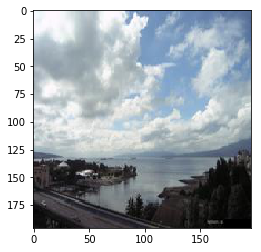

Predicted: [[ 0.69886184  0.30137092]]


In [28]:
img_path = PHOTO_PATH+"/"+"katkam-20160623160000.jpg"
model.load_weights('cnn_D.h5') 

img = image.load_img(img_path , target_size=IMSIZE)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# x = inception.preprocess_input(x)
# x = image.img_to_array(img)
# x = img_datagen.random_transform(x)
x = img_datagen.standardize(x)
preds = model.predict(x)
plt.imshow(img)
plt.show()
print('Predicted:', preds)
# [Clear, Cloudy, Fog, Rain, Snow]

In [ ]:
pics = cleaned_data.loc[cleaned_data["Mapped"].str.contains("Fog")]
# fig = plt.figure()
# fig.add_subplot(221)
# img = image.load_img(img_path , target_size=IMSIZE)
# plt.imshow(img)

# fig.add_subplot(222)


# img2 = image.load_img(PHOTO_PATH+"/"+ "katkam-20160829060000.jpg", target_size=IMSIZE)

# plt.imshow(img2)
# fig.add_subplot(223)
# plt.imshow(img2)

# plt.show()
def listPhotots(photos):
    for p in photos:
        plt.figure(figsize=(8,8))
        img = image.load_img(PHOTO_PATH+"/"+ p, target_size=IMSIZE)
        plt.imshow(img)
        plt.show()
        print(p)
# listPhotots(cleaned_data[cleaned_data["Mapped"].str.contains("Snow")]["Filename"].values)
20160709060000
# listPhotots(["katkam-20160709060000.jpg"])
# listPhotots(cleaned_data[(cleaned_data["Month"] ==11)
#                         ]["Filename"].values)
cleaned_data[(cleaned_data["Mapped"].str.contains("Snow"))]

In [ ]:
cleaned_data

In [29]:
def batchPredict(imageNames):
    result = []
    for filename in imageNames:
        img_path = PHOTO_PATH+"/"+filename
        img = image.load_img(img_path , target_size=IMSIZE)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = img_datagen.standardize(x)
        preds = model.predict(x)
        result.append(preds[0])
    return result

cleaned_data["Predict_Y2"] = batchPredict(cleaned_data["Filename"].values)
cleaned_data["Predict_Y2_Label"] = cleaned_data["Predict_Y2"].apply(lambda x: "Clear" if x[0]>0.6 else "Cloudy")

cleaned_data

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Predict_Y2,Predict_Y2_Label
0,2016-06-05 07:00:00,2016,6,5,07:00,katkam-20160605070000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[0.962561, 0.0375225]",Clear
1,2016-06-05 10:00:00,2016,6,5,10:00,katkam-20160605100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.77532, 0.225642]",Clear
2,2016-06-05 13:00:00,2016,6,5,13:00,katkam-20160605130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.494044, 0.506455]",Cloudy
3,2016-06-05 16:00:00,2016,6,5,16:00,katkam-20160605160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.593583, 0.40653]",Cloudy
4,2016-06-05 19:00:00,2016,6,5,19:00,katkam-20160605190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.0312845, 0.968407]",Cloudy
5,2016-06-06 07:00:00,2016,6,6,07:00,katkam-20160606070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.494044, 0.506455]",Cloudy
6,2016-06-06 10:00:00,2016,6,6,10:00,katkam-20160606100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.605654, 0.395017]",Clear
7,2016-06-06 13:00:00,2016,6,6,13:00,katkam-20160606130000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.494044, 0.506455]",Cloudy
8,2016-06-06 16:00:00,2016,6,6,16:00,katkam-20160606160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[0.616217, 0.383477]",Clear
9,2016-06-06 19:00:00,2016,6,6,19:00,katkam-20160606190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.0180905, 0.981782]",Cloudy


In [31]:
cleaned_data.iloc[150:190]

,Date/Time,Year,Month,Day,Time_x,Filename,Mapped,Weather,Y,Predict_Y2,Predict_Y2_Label
150,2016-06-30 13:00:00,2016,6,30,13:00,katkam-20160630130000.jpg,Cloudy,Cloudy,"[0, 1, 0, 0, 0]","[0.723762, 0.277284]",Clear
151,2016-06-30 16:00:00,2016,6,30,16:00,katkam-20160630160000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.145473, 0.85398]",Cloudy
152,2016-06-30 19:00:00,2016,6,30,19:00,katkam-20160630190000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.388654, 0.610345]",Cloudy
153,2016-07-01 07:00:00,2016,7,1,07:00,katkam-20160701070000.jpg,"Rain,Cloudy",Rain,"[0, 1, 0, 1, 0]","[2.06624e-09, 1.0]",Cloudy
154,2016-07-01 10:00:00,2016,7,1,10:00,katkam-20160701100000.jpg,"Rain,Cloudy",Rain,"[0, 1, 0, 1, 0]","[3.51169e-10, 1.0]",Cloudy
155,2016-07-01 13:00:00,2016,7,1,13:00,katkam-20160701130000.jpg,Cloudy,Cloudy,"[0, 1, 0, 0, 0]","[6.44241e-08, 1.0]",Cloudy
156,2016-07-01 16:00:00,2016,7,1,16:00,katkam-20160701160000.jpg,Clear,Mainly Clear,"[1, 0, 0, 0, 0]","[0.749312, 0.249731]",Clear
157,2016-07-01 19:00:00,2016,7,1,19:00,katkam-20160701190000.jpg,Cloudy,Cloudy,"[0, 1, 0, 0, 0]","[2.58626e-05, 0.999974]",Cloudy
158,2016-07-02 07:00:00,2016,7,2,07:00,katkam-20160702070000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.480371, 0.520497]",Cloudy
159,2016-07-02 10:00:00,2016,7,2,10:00,katkam-20160702100000.jpg,Cloudy,Mostly Cloudy,"[0, 1, 0, 0, 0]","[0.543375, 0.457729]",Cloudy
